In [2]:
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import units as u
from astropy.coordinates import SkyCoord,Angle 
from astropy.io import ascii
from astropy.units import Quantity
#from astroquery.gaia import Gaia
import os
import warnings
from astropy.wcs import WCS
from astropy.io import fits
from matplotlib.colors import LogNorm
warnings.filterwarnings("ignore")
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u
from astropy.coordinates import CartesianRepresentation
from astropy.coordinates import UnitSphericalRepresentation

In [3]:
os.chdir('D:\\Documents\Research\Supernova Remnant Data\G11.2-0.3')

In [19]:
image_file = fits.open('G11.2-0.3 Green.fits')
#image_file = fits.open('XRAYimage.fits')
image_file.info()
image_data = image_file[0].data
image_header = image_file[0]
wcs = WCS(image_header.header)
image_file.close

Filename: G11.2-0.3 Green.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     118   (300, 300)   float32   


<bound method HDUList.close of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001AE96E3BE48>]>

In [84]:
tsp = ascii.read('G11.2-0.3 contour - best.txt')
tsra = tsp[0][0:]
tsdec = tsp[0][1:]

In [85]:
p1 = np.random.randint(0,len(tsra)-2)
p3 = np.random.randint(0,len(tsra)-2)

p2 = p1 + 1
p4 = p3 + 1

# Try this instead:
# Take two adjacent points
s1 = str(tsra[p1])+' '+str(tsdec[p1])
s2 = str(tsra[p2])+' '+str(tsdec[p2])
s3 = str(tsra[p3])+' '+str(tsdec[p3])
s4 = str(tsra[p4])+' '+str(tsdec[p4])

coords = SkyCoord([s1,s2],unit=(u.deg,u.deg))
coords_2 = SkyCoord([s3,s4],unit=(u.deg,u.deg))

c1 = coords[0]
c2 = coords[1]

c3 = coords_2[0]
c4 = coords_2[1]

# Calculate their midpoint
midpoint = SkyCoord(coords.data.mean(), representation_type='unitspherical', frame=coords)
midpoint_2 = SkyCoord(coords_2.data.mean(), representation_type='unitspherical', frame=coords_2)
# Calculate the position angle from c1->c2
pa = c1.position_angle(c2).degree
pa_2 = c3.position_angle(c4).degree
# Here I'm generating a list of coordinates up to
# maxsep (maximum separation) that I will draw on
# the plot.  I step out in increments from midpoint,
# so the line is drawn normal to the line from the
# input c1->c2.

maxsep = 20.0*u.arcmin
steps = 10
line_coords = [midpoint]
print(midpoint.dec.degree)
scale=np.cos(midpoint.dec.degree*np.pi/180.0)
print(scale*90.0/2.0)
for i in np.arange(1,steps):
    fracsep = maxsep * float(i)/float(steps)
    line_coords.append(midpoint.directional_offset_by((pa-90.0+scale/2.0*90.0)*u.deg,fracsep))
#Outside the Remnant
#for i in np.arange(1,steps):
#    fracsep = maxsep * float(i)/float(steps)
#    line_coords.append(midpoint.directional_offset_by((pa+90.0+scale/2.0*90.0)*u.deg,fracsep))
draw_ra = [coord.ra.degree for coord in line_coords]
draw_dec = [coord.dec.degree for coord in line_coords]

# input c3->c4.

maxsep = 20.0*u.arcmin
steps = 10
line_coords_2 = [midpoint_2]
print(midpoint_2.dec.degree)
scale=np.cos(midpoint_2.dec.degree*np.pi/180.0)
print(scale*90.0/2.0)
for i in np.arange(1,steps):
    fracsep = maxsep * float(i)/float(steps)
    line_coords_2.append(midpoint_2.directional_offset_by((pa_2-90.0+scale/2.0*90.0)*u.deg,fracsep))
#Outside the Remnant
#for i in np.arange(1,steps):
#    fracsep = maxsep * float(i)/float(steps)
#    line_coords_2.append(midpoint_2.directional_offset_by((pa_2+90.0+scale/2.0*90.0)*u.deg,fracsep))
draw_ra_2 = [coord.ra.degree for coord in line_coords_2]
draw_dec_2 = [coord.dec.degree for coord in line_coords_2]

norm_1 = SkyCoord(draw_ra,draw_dec, unit=(u.deg,u.deg))
norm_2 = SkyCoord(draw_ra_2,draw_dec_2, unit=(u.deg,u.deg))

line_cooefs_1 = np.polyfit(draw_ra,draw_dec,1)
line_cooefs_2 = np.polyfit(draw_ra_2,draw_dec_2,1)
x = np.linspace(min(tsra),max(tsra),1000)
a1 = line_cooefs_1[0]
b1 = line_cooefs_1[1]
a2 = line_cooefs_2[0]
b2 = line_cooefs_2[1]
normal_approx_1 = a1*x+b1
normal_approx_2 = a2*x+b2
intercept_index = np.argwhere(np.diff(np.sign(normal_approx_1 - normal_approx_2))).flatten()
print(intercept_index)

-19.43199348015974
42.436666571987
-19.422660250527553
42.43910471056119
[]


In [86]:
len(normal_approx_2[intercept_index])

0

In [87]:
len(intercept_index)

0

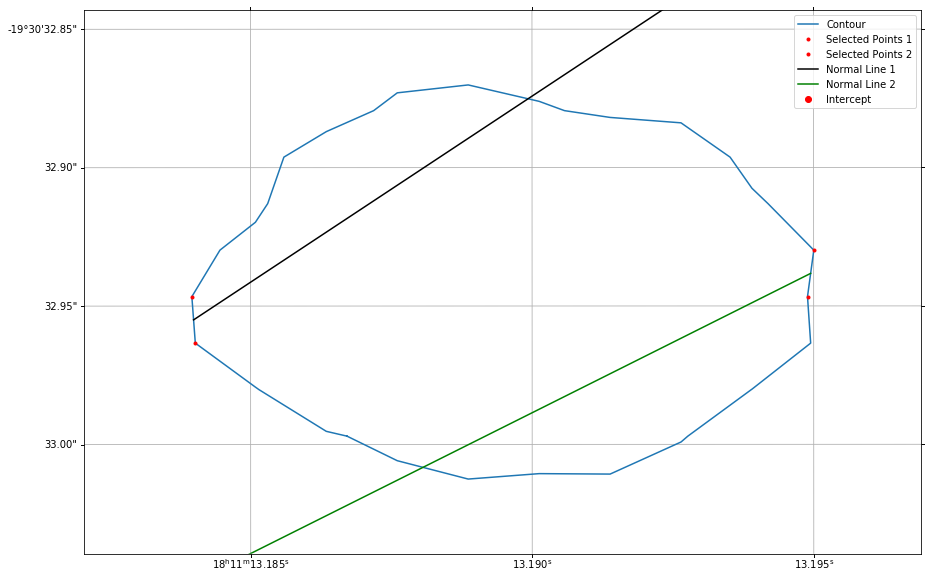

In [88]:
plt.figure(figsize=(15,10))
ax = plt.subplot(projection=wcs)
plt.plot(tsra,tsdec, label = 'Contour')
plt.plot([c1.ra.degree,c2.ra.degree],[c1.dec.degree,c2.dec.degree], 'r.', label = 'Selected Points 1')
plt.plot([c3.ra.degree,c4.ra.degree],[c3.dec.degree,c4.dec.degree], 'r.', label = 'Selected Points 2')
plt.plot(draw_ra, draw_dec, 'k-', label ='Normal Line 1')
plt.plot(draw_ra_2, draw_dec_2, 'g-', label ='Normal Line 2')
plt.plot(x[intercept_index],normal_approx_2[intercept_index],'ro',label = 'Intercept')
#plt.plot(x[intercept_index],normal_approx_1[intercept_index],'r.',label = 'Intercept')



plt.xlim(min(tsra)-0.015,max(tsra)+0.015)
plt.ylim(min(tsdec)-0.015,max(tsdec)+0.015)
ax.grid()
plt.legend()
plt.gca().invert_xaxis()
plt.savefig('g11.2 intersection.jpeg')

In [89]:
n = np.linspace(1,300,300)
len(n)

300

In [90]:
intercept_ra = []
intercept_dec = []
nend = 1000
n = np.linspace(1,nend,nend)
for i in range(len(n)):
    n_i = n[i]
    p1 = np.random.randint(0,len(tsra)-2)
    p3 = np.random.randint(0,len(tsra)-2)

    p2 = p1 + 1
    p4 = p3 + 1

    # Try this instead:
    # Take two adjacent points
    s1 = str(tsra[p1])+' '+str(tsdec[p1])
    s2 = str(tsra[p2])+' '+str(tsdec[p2])
    s3 = str(tsra[p3])+' '+str(tsdec[p3])
    s4 = str(tsra[p4])+' '+str(tsdec[p4])

    coords = SkyCoord([s1,s2],unit=(u.deg,u.deg))
    coords_2 = SkyCoord([s3,s4],unit=(u.deg,u.deg))

    c1 = coords[0]
    c2 = coords[1]

    c3 = coords_2[0]
    c4 = coords_2[1]

        # Calculate their midpoint
    midpoint = SkyCoord(coords.data.mean(), representation_type='unitspherical', frame=coords)
    midpoint_2 = SkyCoord(coords_2.data.mean(), representation_type='unitspherical', frame=coords_2)
        # Calculate the position angle from c1->c2
    pa = c1.position_angle(c2).degree
    pa_2 = c3.position_angle(c4).degree
        
        # Here I'm generating a list of coordinates up to
        # maxsep (maximum separation) that I will draw on
        # the plot.  I step out in increments from midpoint,
        # so the line is drawn normal to the line from the
        # input c1->c2.

    maxsep = 13.0*u.arcmin
    steps = 10
    line_coords = [midpoint]
    scale=np.cos(midpoint.dec.degree*np.pi/180.0)
    for i in np.arange(1,steps):
        fracsep = maxsep * float(i)/float(steps)
        line_coords.append(midpoint.directional_offset_by((pa-90.0+scale/2.0*90.0)*u.deg,fracsep))
    
    draw_ra = [coord.ra.degree for coord in line_coords]
    draw_dec = [coord.dec.degree for coord in line_coords]

    # input c3->c4.

    maxsep = 13.0*u.arcmin
    steps = 10
    line_coords_2 = [midpoint_2]
    scale=np.cos(midpoint_2.dec.degree*np.pi/180.0)
    
    for i in np.arange(1,steps):
        fracsep = maxsep * float(i)/float(steps)
        line_coords_2.append(midpoint_2.directional_offset_by((pa_2-90.0+scale/2.0*90.0)*u.deg,fracsep))
    draw_ra_2 = [coord.ra.degree for coord in line_coords_2]
    draw_dec_2 = [coord.dec.degree for coord in line_coords_2]



    line_cooefs_1 = np.polyfit(draw_ra,draw_dec,1)
    line_cooefs_2 = np.polyfit(draw_ra_2,draw_dec_2,1)
        
    x = np.linspace(min(tsra),max(tsra),1000)
    a1 = line_cooefs_1[0]
    b1 = line_cooefs_1[1]
    a2 = line_cooefs_2[0]
    b2 = line_cooefs_2[1]
    normal_approx_1 = a1*x+b1
    normal_approx_2 = a2*x+b2
    intercept_index = np.argwhere(np.diff(np.sign(normal_approx_1 - normal_approx_2))).flatten()
    
    if(len(intercept_index) == 0):
        #i += 1
        print('%.2f' %( n_i/nend * 100),'% No Intersection') 
    else:
        intercept_ra.append(x[intercept_index[0]])
        intercept_dec.append(normal_approx_2[intercept_index[0]])
        
        print('%.2f' % (n_i/nend * 100),'%',x[intercept_index],normal_approx_2[intercept_index])  
        
intercept_ra = np.asarray(intercept_ra)
intercept_dec = np.asarray(intercept_dec)

0.10 % [272.84073247] [-19.44155467]
0.20 % [272.84073247] [-19.44153904]
0.30 % No Intersection
0.40 % No Intersection
0.50 % [272.84090617] [-19.40426]
0.60 % [272.84455375] [-19.3896427]
0.70 % [272.84663809] [-19.41540251]
0.80 % No Intersection
0.90 % No Intersection
1.00 % [272.90968926] [-19.38872655]
1.10 % [272.87460294] [-19.45098939]
1.20 % No Intersection
1.30 % No Intersection
1.40 % No Intersection
1.50 % [272.84603016] [-19.44177496]
1.60 % [272.84698548] [-19.4457526]
1.70 % [272.91021035] [-19.42431346]
1.80 % [272.9068233] [-19.68584848]
1.90 % No Intersection
2.00 % [272.83864813] [-19.42861484]
2.10 % [272.84490114] [-19.45547887]
2.20 % [272.85758086] [-19.44225525]
2.30 % [272.84351159] [-19.45049559]
2.40 % [272.90387049] [-19.43835416]
2.50 % No Intersection
2.60 % [272.91264207] [-19.44664216]
2.70 % [272.90213355] [-19.41506165]
2.80 % [272.84490114] [-19.45566862]
2.90 % [272.89058285] [-19.44366188]
3.00 % [272.86374702] [-19.40018005]
3.10 % No Intersection

In [91]:
intercepts = SkyCoord(intercept_ra,intercept_dec,unit = (u.deg,u.deg))
intercepts_xyz = intercepts.represent_as(CartesianRepresentation)

intercept_x_mean = np.mean(intercepts_xyz.x)
intercept_y_mean = np.mean(intercepts_xyz.y)
intercept_z_mean = np.mean(intercepts_xyz.z)

intercept_x_rms = np.sign(intercept_x_mean)*np.sqrt(np.mean(intercepts_xyz.x**2))
intercept_y_rms = np.sign(intercept_y_mean)*np.sqrt(np.mean(intercepts_xyz.y**2))
intercept_z_rms = np.sign(intercept_z_mean)*np.sqrt(np.mean(intercepts_xyz.z**2))

intercept_x_variance_step = ((intercepts_xyz.x - np.mean(intercepts_xyz.x))**2)
intercept_y_variance_step = ((intercepts_xyz.y - np.mean(intercepts_xyz.y))**2)
intercept_z_variance_step = ((intercepts_xyz.z - np.mean(intercepts_xyz.z))**2)

intercept_x_variance = np.mean(intercept_x_variance_step)
intercept_y_variance = np.mean(intercept_y_variance_step)
intercept_z_variance = np.mean(intercept_z_variance_step)

intercept_mean_cart = SkyCoord(x = intercept_x_mean, y = intercept_y_mean, z = intercept_z_mean, representation_type='cartesian')
intercept_mean = intercept_mean_cart.represent_as(UnitSphericalRepresentation)

intercept_rms_cart = SkyCoord(x = intercept_x_rms, y = intercept_y_rms, z = intercept_z_rms, representation_type='cartesian')
intercept_rms = intercept_rms_cart.represent_as(UnitSphericalRepresentation)

intercept_variance_cart = SkyCoord(x = intercept_x_variance, y = intercept_y_variance, z = intercept_z_variance, representation_type='cartesian')
intercept_variance = intercept_variance_cart.represent_as(UnitSphericalRepresentation)



center_mean = SkyCoord(intercept_mean, unit=(u.deg,u.deg),  representation_type = 'unitspherical', frame = coords)
center_rms  = SkyCoord(intercept_rms , unit=(u.deg,u.deg),  representation_type = 'unitspherical', frame = coords)

#center_error_ra = np.sqrt(center_rms.ra.deg**2-center_mean.ra.deg**2)
#center_error_dec = np.sqrt(np.absolute(center_rms.dec.deg**2-center_mean.dec.deg**2))

center_error_ra = center_rms.ra.deg**2-center_mean.ra.deg**2
center_error_dec = np.absolute(center_rms.dec.deg**2-center_mean.dec.deg**2)


center_diff_ra = np.sqrt(center_rms.ra.deg-center_mean.ra.deg)
center_diff_dec = np.sqrt(np.absolute(center_rms.dec.deg-center_mean.dec.deg))
tvra = np.sqrt(np.mean((intercept_ra - np.mean(intercept_ra))**2))
tvdec = np.sqrt(np.mean((intercept_dec - np.mean(intercept_dec))**2))
print(center_mean.ra.deg,center_mean.dec.deg)
print(center_rms.ra.deg,center_rms.dec.deg)
print(tvra,tvdec)

272.8732126958943 -19.422275031103197
272.8733308417149 -19.422329213440527
0.02605099514186076 0.05084878158542516


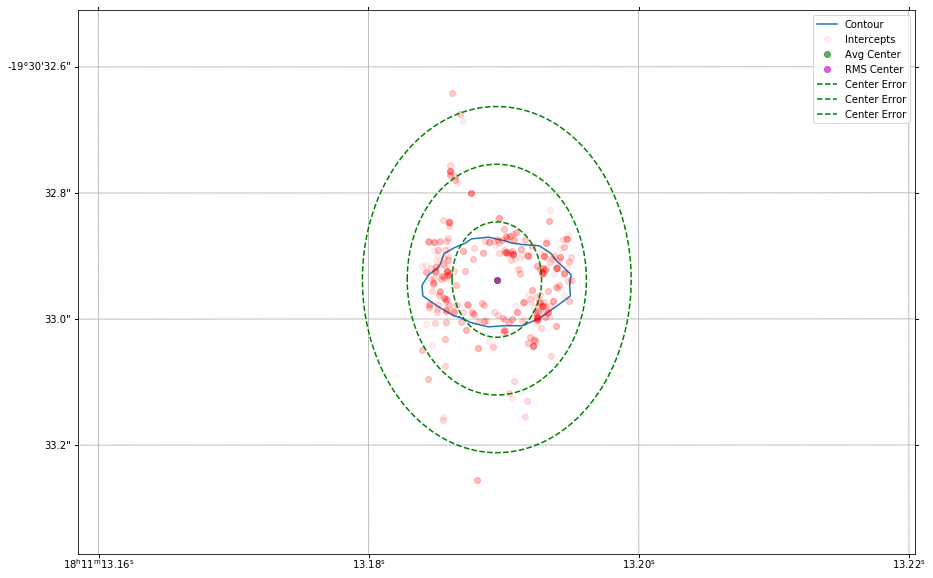

In [92]:
offset = 10*u.arcsecond
offset_deg = offset.to(u.deg)
phi = np.radians(0)
#test_snr_coord = snr_gcoords
#snr_ra_error = np.absolute(test_snr_coord.ra.deg - snr_coords.ra.deg)
#snr_dec_error = np.absolute(test_snr_coord.dec.deg - snr_coords.dec.deg)
t = np.linspace(0,2*np.pi, 1000)
plt.figure(figsize=(15,10))
ax = plt.subplot(projection=wcs)
plt.plot(tsra,tsdec, label = 'Contour')
plt.plot(intercept_ra,intercept_dec, 'ro', label = 'Intercepts', alpha = 0.07)
#plt.plot(snr_coords.ra.deg,snr_coords.dec.deg,'b^', label = 'Ryans Guessed Center', alpha = 0.5)

plt.plot(center_mean.ra.deg,center_mean.dec.deg, 'go', label = 'Avg Center', alpha = 0.6)
#plt.plot(center_mean.ra.deg + center_error_ra*np.cos(t), center_mean.dec.deg + center_error_dec*np.sin(t), 'b-', label = 'Center Error', alpha =1.0)
plt.plot(center_rms.ra.deg,center_rms.dec.deg, 'mo', label = 'RMS Center', alpha = 0.6)
#plt.plot(center_mean.ra.deg + center_diff_ra*np.cos(t), center_mean.dec.deg + center_diff_dec*np.sin(t), 'b-', label = 'Center Error', alpha =1.0)

plt.plot(center_mean.ra.deg + tvra*np.cos(t), center_mean.dec.deg + tvdec*np.sin(t), 'g--', label = 'Center Error', alpha =1.0)
plt.plot(center_mean.ra.deg + 2*tvra*np.cos(t), center_mean.dec.deg + 2*tvdec*np.sin(t), 'g--', label = 'Center Error', alpha =1.0)
plt.plot(center_mean.ra.deg + 3*tvra*np.cos(t), center_mean.dec.deg + 3*tvdec*np.sin(t), 'g--', label = 'Center Error', alpha =1.0)

plt.xlim(min(tsra)-0.2,max(tsra)+0.2)
plt.ylim(min(tsdec)-0.2,max(tsdec)+0.2)
ax.grid()
plt.legend()
plt.gca().invert_xaxis()
plt.savefig('g11.2 1000 intersection center and error.jpeg')

In [93]:
print('Percentage of NO intersections:', '%.2f' % ((1-len(intercept_ra)/nend)*100),'%')

Percentage of NO intersections: 30.70 %


In [ ]:
#Points  All Fast Stars
with open(snr_name +'_ds9_ ' + str(nend) + '_residue_points.reg', 'a+') as r:
    r.write('# Region file format: DS9 version 4.1 \
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 \
dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nfk5\n')
    for i in range(len(intercept_ra)):
        r.write('point(' + str(intercept_ra[i]) + ',' + str(intercept_dec[i]) + ')# point=x;')
r.close()